# MLAI Week 6: Bayesian Regression

### Neil D. Lawrence

### 3rd November 2015

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Two Simultaneous Equations

A system of two simultaneous equations with two
unknowns.

How do we deal with three simultaneous
equations with only two unknowns?

$$\begin{aligned}
        \dataScalar_1 = & m\inputScalar_1 + c\\
        \dataScalar_2 = & m\inputScalar_2 + c
      \end{aligned}$$ 
      
$$\begin{aligned}
        \dataScalar_1-\dataScalar_2 = & m(\inputScalar_1 - \inputScalar_2)
      \end{aligned}$$  
      
$$\begin{aligned}
        \frac{\dataScalar_1-\dataScalar_2}{\inputScalar_1 - \inputScalar_2} = & m
      \end{aligned}$$ 
      
$$\begin{aligned}
        m & =\frac{\dataScalar_2-\dataScalar_1}{\inputScalar_2 - \inputScalar_1}\\
        c & = \dataScalar_1 - m \inputScalar_1
      \end{aligned}$$ 
      
$$\begin{aligned}
        \dataScalar_1 = & m\inputScalar_1 + c\\
        \dataScalar_2 = & m\inputScalar_2 + c\\
        \dataScalar_3 = & m\inputScalar_3 + c
      \end{aligned}$$

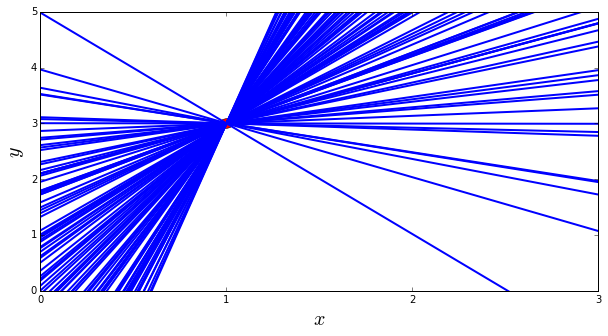

In [5]:
x = 1.
y = 3.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'o', markersize=10, linewidth=3, color=[1., 0., 0.])
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3, 4, 5])
ylim = [0, 5]
xlim = [0, 3]
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
fig.savefig('./diagrams/one_point0.svg')

xvals = np.linspace(0, 3, 2)[:, None]
count=0
for i in range(100):
    c = np.random.normal(size=(1,1))*2
    m = (y - c)/x
    yvals = m*xvals+c
    ax.plot(xvals, yvals, '-', linewidth=2, color=[0., 0., 1.])
    if i < 9 or i == 100:
        count += 1
        fig.savefig('./diagrams/one_point' + str(count) + '.svg')

### Underdetermined System
- What about two unknowns and *one* observation?
    $$\dataScalar_1 =  m\inputScalar_1 + c$$
![](./diagrams/one_point0.svg)

### Underdetermined System
- Can compute $m$ given $c$.
$$m = \frac{\dataScalar_1 -c}{\inputScalar}$$

### Underdetermined System

- Can compute $m$ given $c$.

Assume 
$$c \sim \mathcal{N}(0, 4),$$

### Overdetermined System

-   With two unknowns and two observations: 
    $$\begin{aligned}
          \dataScalar_1 = & m\inputScalar_1 + c\\
          \dataScalar_2 = & m\inputScalar_2 + c
        \end{aligned}$$

-   Additional observation leads to *overdetermined* system.
    $$\dataScalar_3 =  m\inputScalar_3 + c$$

-   This problem is solved through a noise model
    $\epsilon \sim \gaussianSamp{0}{\dataStd^2}$ $$\begin{aligned}
          \dataScalar_1 = m\inputScalar_1 + c + \epsilon_1\\
          \dataScalar_2 = m\inputScalar_2 + c + \epsilon_2\\
          \dataScalar_3 = m\inputScalar_3 + c + \epsilon_3
        \end{aligned}$$

### Noise Models

-   We aren’t modeling entire system.

-   Noise model gives mismatch between model and data.

-   Gaussian model justified by appeal to central limit theorem.

-   Other models also possible (Student-$t$ for heavy tails).

-   Maximum likelihood with Gaussian noise leads to *least squares*.

### Different Types of Uncertainty

-   The first type of uncertainty we are assuming is
    *aleatoric* uncertainty.

-   The second type of uncertainty we are assuming is
    *epistemic* uncertainty.

### Aleatoric Uncertainty

-   This is uncertainty we couldn’t know even if we wanted to. e.g. the
    result of a football match before it’s played.

-   Where a sheet of paper might land on the floor.

### Epistemic Uncertainty

-   This is uncertainty we could in principal know the answer too. We
    just haven’t observed enough yet, e.g. the result of a football
    match *after* it’s played.

-   What colour socks your lecturer is wearing.

### Reading

-   @Bishop:book06 Section 1.2.3 (pg 21–24).

-   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
    pg 30-32).

-   @Rogers:book11 use an example of a coin toss for introducing
    Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117). Although
    you also need the beta density which we haven’t yet discussed. This
    is also the example that @Laplace:memoire74 used.

<!-- -->

-   Bayesian Inference

    -   @Rogers:book11 use an example of a coin toss for introducing
        Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117).
        Although you also need the beta density which we haven’t
        yet discussed. This is also the example that
        @Laplace:memoire74 used.

    -   @Bishop:book06 Section 1.2.3 (pg 21–24).

    -   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
        pg 30-32).

### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\dataVector|\inputVector, c, m, \dataStd^2) = \frac{1}{\left(2\pi\dataStd^2\right)^{\frac{\numData}{2}}} \exp\left(-\frac{1}{2\dataStd^2}\sum_{i=1}^\numData(\dataScalar_i - m\inputScalar_i - c)^2\right)$$


$$p(c| \dataVector, \inputVector, m, \dataStd^2) = \frac{p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)}{p(\dataVector|\inputVector, m, \dataStd^2)}$$

$$p(c| \dataVector, \inputVector, m, \dataStd^2) =  \frac{p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)}{\int p(\dataVector|\inputVector, c, m, \dataStd^2)p(c) \text{d} c}$$

$$p(c| \dataVector, \inputVector, m, \dataStd^2) \propto  p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)$$

$$\begin{aligned}
    \log p(c | \dataVector, \inputVector, m, \dataStd^2) =&-\frac{1}{2\dataStd^2} \sum_{i=1}^\numData(\dataScalar_i-c - m\inputScalar_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\dataStd^2}\sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i)^2 -\left(\frac{\numData}{2\dataStd^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i)}{\dataStd^2},
  \end{aligned}$$

complete the square of the quadratic form to obtain
$$\log p(c | \dataVector, \inputVector, m, \dataStd^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(\numData\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\dataStd^2} \sum_{n=1}^N(\dataScalar_i-m\inputScalar_i)$.

### The Joint Density

-   Really want to know the *joint* posterior density over the
    parameters $c$ *and* $m$.

-   Could now integrate out over $m$, but it’s easier to consider the
    multivariate case.

### Height and Weight Models

In [ ]:

def plot_height(ax, h, ph):
    ax.plot(h, ph, '-', color=[1, 0, 0], linewidth=3)
    ax.set_xticks([1.25, 1.7, 2.15])
    ax.set_yticks([1, 2, 3])
    ax.set_xlabel('$h/m$', fontsize=20)
    ax.set_ylabel('$p(h)$', fontsize=20)

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.vlines(xlim[0], ylim[0], ylim[1], color='k')
    ax.hlines(ylim[0], xlim[0], xlim[1], color='k')

def plot_weight(ax, w, pw):
    ax.plot(w, pw, '-', color=[0, 0, 1.], linewidth=3)
    ax.set_xticks([55, 75, 95])
    ax.set_yticks([0.02, 0.04, 0.06])
    ax.set_xlabel('$w/kg$', fontsize=20)
    ax.set_ylabel('$p(w)$', fontsize=20)

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.vlines(xlim[0], ylim[0], ylim[1], color='k')
    ax.hlines(ylim[0], xlim[0], xlim[1], color='k')

fig, ax = plt.subplots(1, 2, figsize=(6,2))

muh = 1.7
varh = 0.0225
muw = 75
varw = 36
tau = 2*np.pi
h = np.linspace(1.25, 2.15, 100)[:, None]
ph = 1/np.sqrt(tau*varh)*np.exp(-1/(2*varh)*(h - muh)**2)
plot_height(ax[0], h, ph)

w = np.linspace(55, 95, 100)[:, None]
pw = 1/np.sqrt(tau*varw)*np.exp(-1/(2*varw)*(w - muw)**2)
plot_weight(ax[1], w, pw)
#ax.set_box('off')
fig.savefig('./diagrams/height_weight_gaussian.svg')


![]('./diagrams/height_weight_gaussian.svg')

###  Sampling Two Dimensional Variables

In [ ]:
num_samps = 20
ax=[]

ax.append(plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2))
ax.append(plt.subplot2grid((2,4), (0,3)))
ax.append(plt.subplot2grid((2,4), (1,3)))

ax[0].plot(muh, muw, 'x', color=[1., 0., 1.], markersize=5., linewidth=3)
theta = np.linspace(0, tau, 100)
xel = np.sin(theta)*np.sqrt(varh) + muh
yel = np.cos(theta)*np.sqrt(varw) + muw
ax[0].plot(xel, yel, '-', color=[1., 0., 1.], linewidth=3)
ax[0].set_xlim([min(h), max(h)])
ax[0].set_ylim([min(w), max(w)])
ax[0].set_yticks([55, 75, 95])
ax[0].set_xticks([1.25, 1.7, 2.15])
ax[0].set_xlabel('$h/m$', fontsize=20)
ax[0].set_ylabel('$w/kg$', fontsize=20)

ylim = ax[0].get_ylim()
xlim = ax[0].get_xlim()
ax[0].vlines(xlim[0], ylim[0], ylim[1], color=[0.,0.,0.])
ax[0].hlines(ylim[0], xlim[0], xlim[1], color=[0., 0., 0.])

plot_height(ax[1], h, ph)
plot_weight(ax[2], w, pw)
count = 0
for i in range(num_samps):
    hval = np.random.normal(size=(1,1))*np.sqrt(varh) + muh
    wval = np.random.normal(size=(1,1))*np.sqrt(varw) + muw
    a1 = ax[1].plot(hval, 0.1, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/independent_height_weight' + str(count) + '.png')
    count+=1
    a2 = ax[2].plot(wval, 0.002, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/independent_height_weight' + str(count) + '.png')
    count+=1
    a0 = ax[0].plot(hval, wval, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/independent_height_weight' + str(count) + '.png')
    count+=1
    
    a0[0].set(color=[0.,0.,0.])
    a1[0].set(color=[0.,0.,0.])
    a2[0].set(color=[0.,0.,0.])
    plt.savefig('./diagrams/independent_height_weight' + str(count) + '.png')
    count+=1


In [ ]:
import pods
pods.notebook.display_plots('independent_height_weight{fig}.png', './diagrams/', fig=(0, 79))


### Independence Assumption

- This assumes height and weight are independent.
    $$
    p(h, w) = p(h)p(w)
    $$
- In reality they are dependent (body mass index) $= \frac{w}{h^2}$.


### Sampling Two Dimensional Variables


In [ ]:
ax=[]

ax.append(plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2))
ax.append(plt.subplot2grid((2,4), (0,3)))
ax.append(plt.subplot2grid((2,4), (1,3)))

covMat = np.asarray([[1, 0.995], [0.995, 1]])
fact = np.asarray([[np.sqrt(varh), 0], [0, np.sqrt(varw)]])
covMat = np.dot(np.dot(fact,covMat), fact)
_, R = np.linalg.eig(covMat)

ax[0].plot(muh, muw, 'x', color=[1., 0., 1.], markersize=5, linewidth=3)
theta = np.linspace(0, tau, 100)
xel = np.sin(theta)*np.sqrt(varh)
yel = np.cos(theta)*np.sqrt(varw)
vals = np.dot(R,np.vstack([xel, yel]))
ax[0].plot(vals[0, :]+muh, vals[1, :]+muw, '-', color=[1., 0., 1.], linewidth=3)
ax[0].set_xlim([h.min(), h.max()])
ax[0].set_ylim([w.min(), w.max()])
ax[0].set_yticks([55, 75, 95])
ax[0].set_xticks([1.25, 1.7, 2.15])
ax[0].set_xlabel('$h/m$', fontsize=20)
ax[0].set_ylabel('$w/kg$', fontsize=20)

plot_height(ax[1], h, ph)
plot_weight(ax[2], w, pw)
count = 0
for i in range(num_samps):
    vec_s = np.dot(np.dot(R,fact),np.random.normal(size=(2,1)))
    hval = vec_s[0] + muh
    wval = vec_s[1] + muw
    a1 = ax[1].plot(hval, 0.1, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/correlated_height_weight' + str(count) + '.png')
    count+=1
    a2 = ax[2].plot(wval, 0.002, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/correlated_height_weight' + str(count) + '.png')
    count+=1
    a0 = ax[0].plot(hval, wval, marker='o', linewidth=3, color=[1., 0., 0.])
    plt.savefig('./diagrams/correlated_height_weight' + str(count) + '.png')
    count+=1
    
    a0[0].set(color=[0.,0.,0.])
    a1[0].set(color=[0.,0.,0.])
    a2[0].set(color=[0.,0.,0.])
    plt.savefig('./diagrams/correlated_height_weight' + str(count) + '.png')
    count+=1

In [ ]:
pods.notebook.display_plots('correlated_height_weight{fig}.png', './diagrams/', fig=(0, 79))

### Independent Gaussians

$$p(w, h) = p(w)p(h)$$ 
$$p(w, h) = \frac{1}{\sqrt{2\pi \dataStd_1^2}\sqrt{2\pi\dataStd_2^2}} \exp\left(-\frac{1}{2}\left(\frac{(w-\meanScalar_1)^2}{\dataStd_1^2} + \frac{(h-\meanScalar_2)^2}{\dataStd_2^2}\right)\right)$$

$$p(w, h) = \frac{1}{\sqrt{2\pi\dataStd_1^2 2\pi\dataStd_2^2}} \exp\left(-\frac{1}{2}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\meanScalar_1 \\ \meanScalar_2\end{bmatrix}\right)^\top\begin{bmatrix}\dataStd_1^2& 0\\0&\dataStd_2^2\end{bmatrix}^{-1}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\meanScalar_1 \\ \meanScalar_2\end{bmatrix}\right)\right)$$

$$p(\dataVector) = \frac{1}{\det{2\pi \mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\mathbf{D}^{-1}(\dataVector - \meanVector)\right)$$

### Correlated Gaussian

Form correlated from original by rotating the data space using matrix
$\rotationMatrix$.


$$p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\mathbf{D}^{-1}(\dataVector - \meanVector)\right)$$


$$p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\rotationMatrix^\top\dataVector - \rotationMatrix^\top\meanVector)^\top\mathbf{D}^{-1}(\rotationMatrix^\top\dataVector - \rotationMatrix^\top\meanVector)\right)$$

$$p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\rotationMatrix\mathbf{D}^{-1}\rotationMatrix^\top(\dataVector - \meanVector)\right)$$
this gives a covariance matrix:
$$\covarianceMatrix^{-1} = \rotationMatrix \mathbf{D}^{-1} \rotationMatrix^\top$$

$$p(\dataVector) = \frac{1}{\det{2\pi\covarianceMatrix}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\covarianceMatrix^{-1} (\dataVector - \meanVector)\right)$$
this gives a covariance matrix:
$$\covarianceMatrix = \rotationMatrix \mathbf{D} \rotationMatrix^\top$$

### Reading

-   Section 2.3 of @Bishop:book06 up to top of pg 85
    (multivariate Gaussians).

-   Section 3.3 of @Bishop:book06 up to 159 (pg 152–159).

### Revisit Olympics Data

-   Use Bayesian approach on olympics data with polynomials.

-   Choose a prior
    $\mappingVector \sim \gaussianSamp{\zerosVector}{\alpha \eye}$ with
    $\alpha = 1$.

-   Choose noise variance $\dataStd^2 = 0.01$

### Sampling the Prior

-   Always useful to perform a ‘sanity check’ and sample from the prior
    before observing the data.

-   Since $\dataVector = \basisMatrix \mappingVector + \noiseVector$
    just need to sample $$\mappingScalar \sim \gaussianSamp{0}{\alpha}$$
    $$\noiseVector \sim \gaussianSamp{\zerosVector}{\dataStd^2}$$ with
    $\alpha=1$ and $\noiseVector = 0.01$.

In [ ]:
import mlai
import pods

f, ax = plt.subplots(1, 2, figsize=(14,7))

basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
num_data = x.shape[0]

data_limits = [1892, 2020]
max_basis = y.shape[0]

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis+1):
    
    model= mlai.BLM(x, y, alpha=1, sigma2=0.01, 
                    basis=basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective()/num_data 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=sum_squares, objective_ylim=[0, 0.3],
                           fig=f, ax=ax)

In [ ]:
pods.notebook.display_plots('olympic_BLM_polynomial{num_basis}.svg', 
                            directory='./diagrams', num_basis=(1, 27))

### Model Fit

-   Marginal likelihood doesn’t always increase as model
    order increases.

-   Bayesian model always has 2 parameters, regardless of how many basis
    functions (and here we didn’t even fit them).

-   Maximum likelihood model over fits through increasing number
    of parameters.

-   Revisit maximum likelihood solution with validation set.

### Recall: Validation Set for Maximum Likelihood

&lt;1&gt;&lt;2&gt;&lt;3&gt;&lt;4&gt;&lt;5&gt;&lt;6&gt;&lt;7&gt;

*Left*: fit to data, *Right*: model error. &lt;1&gt;<span>Polynomial
order 0, training error -1.8774, validation error -0.13132,
$\sigma^2 = 0.302$, $\sigma = 0.549$.</span>&lt;2&gt;<span>Polynomial
order 1, training error -15.325, validation error 2.5863,
$\sigma^2 = 0.0733$, $\sigma = 0.271$.</span>&lt;3&gt;<span>Polynomial
order 2, training error -17.579, validation error -8.4831,
$\sigma^2 = 0.0578$, $\sigma = 0.240$.</span>&lt;4&gt;<span>Polynomial
order 3, training error -18.064, validation error 11.27,
$\sigma^2 = 0.0549$, $\sigma = 0.234$.</span>&lt;5&gt;<span>Polynomial
order 4, training error -18.245, validation error 232.92,
$\sigma^2 = 0.0539$, $\sigma = 0.232$.</span>&lt;6&gt;<span>Polynomial
order 5, training error -20.471, validation error 9898.1,
$\sigma^2 = 0.0426$, $\sigma = 0.207$.</span>&lt;7&gt;<span>Polynomial
order 6, training error -22.881, validation error 67775,
$\sigma^2 = 0.0331$, $\sigma = 0.182$.</span>

### Regularized Mean

-   Validation fit here based on mean solution for
    $\mappingVector$ only.

-   For Bayesian solution
    $$\meanVector_\mappingScalar = \left[\dataStd^{-2}\basisMatrix^\top\basisMatrix + \alpha^{-1}\eye\right]^{-1} \dataStd^{-2} \basisMatrix^\top \dataVector$$
    instead of
    $$\mappingVector^* = \left[\basisMatrix^\top\basisMatrix\right]^{-1} \basisMatrix^\top \dataVector$$

-   Two are equivalent when $\alpha \rightarrow \infty$.

-   Equivalent to a prior for $\mappingVector$ with infinite variance.

-   In other cases $\alpha \eye$ *regularizes* the system (keeps
    parameters smaller).

### Sampling the Posterior

-   Now check samples by extracting $\mappingVector$ from the
    *posterior*.

-   Now for $\dataVector = \basisMatrix \mappingVector + \noiseVector$
    need
    $$\mappingScalar \sim \gaussianSamp{\meanVector_\mappingScalar}{\covarianceMatrix_\mappingScalar}$$
    with
    $\covarianceMatrix_\mappingScalar = \left[\dataStd^{-2}\basisMatrix^\top \basisMatrix + \alpha^{-1} \eye\right]^{-1}$
    and
    $\meanVector_\mappingScalar =\covarianceMatrix_\mappingScalar \dataStd^{-2} \basisMatrix^\top \dataVector$
    $$\noiseVector \sim \gaussianSamp{\zerosVector}{\dataStd^2}$$ with
    $\alpha=1$ and $\noiseVector = 0.01$.

### Marginal Likelihood

-   The marginal likelihood can also be computed, it has the form:
    $$p(\dataVector|\inputMatrix, \dataStd^2, \alpha) = \frac{1}{(2\pi)^\frac{\numData}{2}\det{\kernelMatrix}^\frac{1}{2}} \exp\left(-\frac{1}{2} \dataVector^\top \kernelMatrix^{-1} \dataVector\right)$$
    where
    $\kernelMatrix = \alpha \basisMatrix\basisMatrix^\top + \dataStd^2 \eye$.

-   So it is a zero mean $\numData$-dimensional Gaussian with covariance
    matrix $\kernelMatrix$.

### Computing the Expected Output

-   Given the posterior for the parameters, how can we compute the
    expected output at a given location?

-   Output of model at location $\inputVector_i$ is given by
    $$\mappingFunction(\inputVector_i; \mappingVector) = \basisVector_i^\top \mappingVector$$

-   We want the expected output under the posterior density,
    $p(\mappingVector|\dataVector, \inputMatrix, \dataStd^2, \alpha)$.

-   Mean of mapping function will be given by $$\begin{aligned}
          \expDist{\mappingFunction(\inputVector_i; \mappingVector)}{p(\mappingVector|\dataVector, \inputMatrix, \dataStd^2, \alpha)} &= \basisVector_i^\top \expDist{\mappingVector}{p(\mappingVector|\dataVector, \inputMatrix, \dataStd^2, \alpha)} \\
          & = \basisVector_i^\top \meanVector_\mappingScalar
        \end{aligned}$$

### Variance of Expected Output

-   Variance of model at location $\inputVector_i$ is given by
    $$\begin{aligned}
          \text{var}(\mappingFunction(\inputVector_i; \mappingVector)) &= \expSamp{(\mappingFunction(\inputVector_i; \mappingVector))^2} - \expSamp{\mappingFunction(\inputVector_i; \mappingVector)}^2 \\&= \basisVector_i^\top \expSamp{\mappingVector\mappingVector^\top} \basisVector_i - \basisVector_i^\top \expSamp{\mappingVector}\expSamp{\mappingVector}^\top \basisVector_i \\&= \basisVector_i^\top \covarianceMatrix_i\basisVector_i
        \end{aligned}$$ where all these expectations are taken under the
    posterior density,
    $p(\mappingVector|\dataVector, \inputMatrix, \dataStd^2, \alpha)$.

### Reading

-   Section 3.7–3.8 of @Rogers:book11 (pg 122–133).

-   Section 3.4 of @Bishop:book06 (pg 161–165).

### References